<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

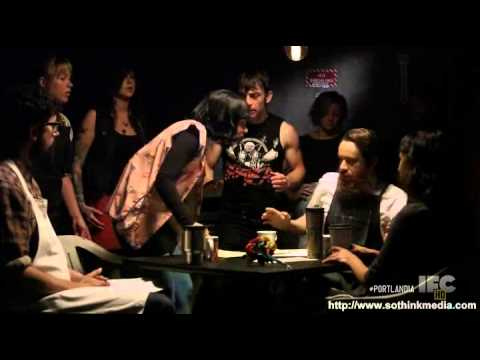

In [5]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [1]:
%pwd

'/Users/mana/projects/Lambda/FLEX/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [3]:
# Start here 
shops.shape

(7616, 3)

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [4]:

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

In [5]:
# Get access to progress_apply
import squarify
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()

In [7]:
nlp = spacy.load('en_core_web_md', disable=['parser', 'tagger'])

In [8]:
# Custom stop words:
STOP_WORDS = nlp.Defaults.stop_words.union([' ', '1', 'coffee', '  ', "check", 'latte', '2', '3', 'got', 'austin'])

In [9]:
# Lemmatization:
def get_lemmas(text):

    lemmas = []
    doc = nlp(text)
    
    for token in doc:
        if ((token.text.lower() not in STOP_WORDS) and (token.is_punct == False) and (token.pos_ != 'PRON')):
            lemmas.append(token.lemma_.lower())
    
    return lemmas

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [10]:
#Clean star_rating column:
def clean_star_rating(rating):
    rating = re.sub(' star rating', '', rating)
    rating = rating.strip()
    return rating

In [11]:
import re
shops['star_rating'] = shops['star_rating'].apply(clean_star_rating)
shops['star_rating'].value_counts()

5.0    3780
4.0    2360
3.0     738
2.0     460
1.0     278
Name: star_rating, dtype: int64

In [12]:
# Starting clean full_review_text column:
# value of 1st row
text = shops['full_review_text'].iloc[9]
text

' 11/10/2016 3 check-ins This place has been shown on my social media for days so i finally visited! One of THE cutest and artistic looking coffeeshops I have ever visited. You can self order which is nice because you can take your time and look at the pictures to help you decide! I especially liked how pictures were shown so I knew which coffee/tea came out aesthetically  I ordered the famous matcha green latte and i dont usually drink coffee but it went beyond my expectations. They give you a good amount and its creamy and sweet. Only downside is no wifi.. So hard to study here. Matcha green tea and living la vida mocha Matcha green tea latte Interior design See all photos from Sarah L. for The Factory - Cafe With a Soul '

In [13]:
re.findall(r'\b[0-3]?[0-9]/[0-3]?[0-9]/(?:[0-9]{2})?[0-9]{2}\b', text)

['11/10/2016']

In [14]:
shops['date'] = shops['full_review_text'].apply(lambda x:re.findall(r'\b[0-3]?[0-9]/[0-3]?[0-9]/(?:[0-9]{2})?[0-9]{2}\b', x)[0])

In [15]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,date
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,11/25/2016
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,12/2/2016
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,11/30/2016
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,11/25/2016
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,12/3/2016


In [16]:
def clean_review_text(text):
    text.strip()
    clean_string = re.sub(r'\b[0-3]?[0-9]/[0-3]?[0-9]/(?:[0-9]{2})?[0-9]{2}\b', '', text)
    return clean_string

In [17]:
shops['clean_review_text'] = shops['full_review_text'].apply(clean_review_text)
shops['clean_review_text'].head(20)

0       1 check-in Love love loved the atmosphere! E...
1       Listed in Date Night: Austin, Ambiance in Au...
2       1 check-in Listed in Brunch Spots I loved th...
3       Very cool decor! Good drinks Nice seating  H...
4       1 check-in They are located within the North...
5       1 check-in Very cute cafe! I think from the ...
6       2 check-ins Listed in "Nuptial Coffee Bliss!...
7       2 check-ins Love this place!  5 stars for cl...
8       1 check-in Ok, let's try this approach...  P...
9       3 check-ins This place has been shown on my ...
10      1 check-in Listed in Americano This is not y...
11      The store has A+ decoration, but honestly, t...
12      1 check-in Listed in 2016 - The Third Time i...
13      This is such a cute little cafe! I've driven...
14      Beautiful eccentric coffee shop with a libra...
15      1 check-in Listed in In Search of Fantastic ...
16      Really love the atmosphere here! I frequent ...
17      1 check-in Check out this video for a re

In [18]:
shops['lemmas'] = shops['clean_review_text'].progress_apply(get_lemmas)  # Might take a few minutes!

100%|██████████| 7616/7616 [01:13<00:00, 102.92it/s]


In [21]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,date,clean_review_text,lemmas
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,11/25/2016,1 check-in Love love loved the atmosphere! E...,"[love, love, love, atmosphere, corner, shop, s..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,12/2/2016,"Listed in Date Night: Austin, Ambiance in Au...","[listed, date, night, ambiance, beautiful, lov..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,11/30/2016,1 check-in Listed in Brunch Spots I loved th...,"[listed, brunch, spots, love, eclectic, homey,..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,11/25/2016,Very cool decor! Good drinks Nice seating H...,"[cool, decor, good, drink, nice, seat, overpri..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,12/3/2016,1 check-in They are located within the North...,"[locate, northcross, mall, shop, center, face,..."


In [22]:
def count(tokens):
    """
    Calculates some basic statistics about tokens in our corpus (i.e. corpus means collections text data)
    """
    # stores the count of each token
    word_counts = Counter()
    
    # stores the number of docs that each token appears in 
    appears_in = Counter()

    total_docs = len(tokens)

    for token in tokens:
        # stores count of every appearance of a token 
        word_counts.update(token)
        # use set() in order to not count duplicates, thereby count the num of docs that each token appears in
        appears_in.update(set(token))

    # build word count dataframe
    temp = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # rank the the word counts
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # calculate the percent total of each token
    wc['pct_total'] = wc['count'].apply(lambda token_count: token_count / total)

    # calculate the cumulative percent total of word counts 
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    # create dataframe for document stats
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    
    # merge word count stats with doc stats
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [23]:
good_condition = (shops['star_rating'] == '4.0') | (shops['star_rating'] == '5.0' )
bad_condition = (shops['star_rating'] == '3.0') | (shops['star_rating'] == '2.0' ) | (shops['star_rating'] == '1.0' )

In [24]:
good_df = shops[good_condition]
bad_df = shops[bad_condition]

In [25]:
wc_good = count(good_df['lemmas'])
wc_bad = count(bad_df['lemmas'])

In [26]:
wc_good_top10 = wc_good[wc_good['rank'] <= 10]
wc_bad_top10 = wc_bad[wc_bad['rank'] <= 10]

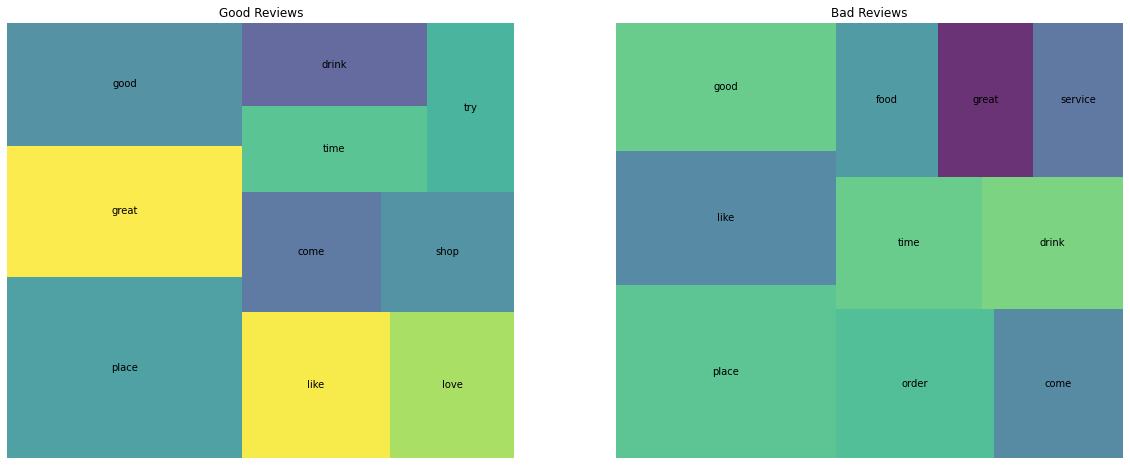

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

axes[0].set_title('Good Reviews')
squarify.plot(sizes=wc_good_top10['pct_total'], label=wc_good_top10['word'], alpha=.8, ax=axes[0])
axes[0].axis('off')

axes[1].set_title('Bad Reviews')
squarify.plot(sizes=wc_bad_top10['pct_total'], label=wc_bad_top10['word'], alpha=.8, ax=axes[1])
axes[1].axis('off')

plt.show()

In [28]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split(' ')
    return tokens

In [29]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,date,clean_review_text,lemmas
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,11/25/2016,1 check-in Love love loved the atmosphere! E...,"[love, love, love, atmosphere, corner, shop, s..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,12/2/2016,"Listed in Date Night: Austin, Ambiance in Au...","[listed, date, night, ambiance, beautiful, lov..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,11/30/2016,1 check-in Listed in Brunch Spots I loved th...,"[listed, brunch, spots, love, eclectic, homey,..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,11/25/2016,Very cool decor! Good drinks Nice seating H...,"[cool, decor, good, drink, nice, seat, overpri..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,12/3/2016,1 check-in They are located within the North...,"[locate, northcross, mall, shop, center, face,..."


In [30]:
# shops['lemmas'].tolist()

In [31]:
type(shops['lemmas'])

pandas.core.series.Series

In [32]:
import functools
import operator
total_tokens = functools.reduce(operator.iconcat, shops['lemmas'].tolist(), [])
print(len(total_tokens))

339413


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

